In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from math import sqrt

import DataAid
import Neros

In [2]:
# Collect the data from each of the folders
sparcGalaxies = DataAid.GetGalaxyData("data/Sparc/Rotmod_LTG/")
xueSofueGalaxies = DataAid.GetGalaxyData("data/XueSofue/")

In [3]:
# Get the galaxies we want from each source
NGC5371 = np.array(sparcGalaxies['NGC5371_rotmod'])
MWXueSofue = np.array(xueSofueGalaxies['MW_lum'])

In [4]:
NGC5371_rad = NGC5371[:,0]
NGC5371_Vobs = NGC5371[:,1]
NGC5371_gas = NGC5371[:,3]
NGC5371_disk = NGC5371[:,4]
NGC5371_bulge = NGC5371[:,5]
NGC5371_VlumSquared = Neros.VlumSquared(NGC5371_gas, NGC5371_disk, NGC5371_bulge)
NGC5371_Vlum = NGC5371_VlumSquared**(1.0/2.0)

MW_rad = MWXueSofue[:,0]
MW_Vlum = MWXueSofue[:,1]
# Interpolation function
MW_Vlum_interp_func = interp1d(MW_rad, MW_Vlum, kind='cubic')

In [11]:
Vlcm = Neros.Vlcm(NGC5371_rad, MW_Vlum_interp_func(NGC5371_rad), NGC5371_Vlum)
print("Vlcm: ")
print(Vlcm)

Milky Way Phi: 
[2.33423939e-07 3.59252726e-07 4.44278142e-07 5.05665900e-07
 5.52840635e-07 6.18635676e-07 6.63772075e-07 6.94881166e-07
 7.19101950e-07 7.37655044e-07 7.52303725e-07 7.63724925e-07
 7.73535967e-07 7.81786526e-07 7.88530927e-07 7.94590777e-07
 7.99845781e-07 8.04456741e-07]
Other Phi: 
[4.12377692e-07 6.63745595e-07 8.54438224e-07 1.00318868e-06
 1.13252936e-06 1.38662715e-06 1.61431664e-06 1.78868843e-06
 1.94265970e-06 2.06943066e-06 2.16815876e-06 2.24238911e-06
 2.30469647e-06 2.35613774e-06 2.39628843e-06 2.43133581e-06
 2.46117013e-06 2.48696927e-06]
Beta: 
[0.000803   0.0007752  0.00078513 0.00081253 0.00081773 0.00084333
 0.00093935 0.00100355 0.00099316 0.00099305 0.00096899 0.0009111
 0.00085254 0.00080377 0.00076476 0.0007191  0.00068349 0.00065385
 0.00062889]
Vlcm: 
[   -6.5596616    -19.66462078   -35.87200802   -54.14002121
   -73.54572076  -126.7547912   -197.20016846  -279.37856853
  -366.9782817   -462.80430112  -571.58832807  -678.95883888
  -783.599

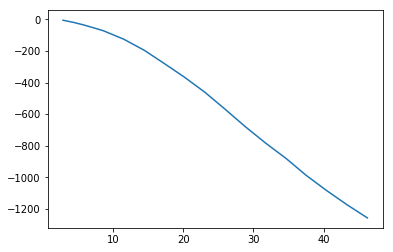

In [9]:
plt.plot(NGC5371_rad[1:], Vlcm)
plt.show()